In [6]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [7]:
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print('X_train:' , x_train.shape)
print('Y_train:' , y_train.shape)
print('X_test:'  , x_test.shape)
print('Y_test:'  , y_test.shape)



X_train: (60000, 784)
Y_train: (60000, 10)
X_test: (10000, 784)
Y_test: (10000, 10)


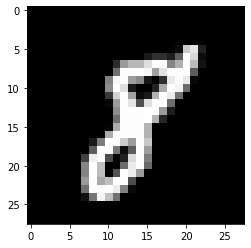

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [8]:
from matplotlib import pyplot
pyplot.imshow(x_train.reshape(60000,-28,28)[17], cmap='gray')
pyplot.show()
print(y_train[17])

In [9]:
from tensorflow.keras import layers

def Model():
    layer1 = layers.Dense(200,activation="tanh",use_bias=True,kernel_initializer="glorot_normal"
                      ,bias_initializer="zeros" , input_shape = (x_train.shape[1],))
    layer2 = layers.Dense(100,activation="tanh",use_bias=True,kernel_initializer="glorot_normal"
                      ,bias_initializer="zeros")
    layer3 = layers.Dense(10,activation="softmax",use_bias=True,kernel_initializer="glorot_normal"
                      ,bias_initializer="zeros")

    return tf.keras.Sequential([layer1,layer2,layer3])


In [12]:
 callback = [tf.keras.callbacks.TensorBoard(log_dir='./tb_logs' ,histogram_freq = 1,write_graph=True,
                        write_images=True,update_freq="epochs"
                        ,profile_batch=2,embeddings_freq=1)]

In [13]:
from keras import losses,metrics,optimizers

model = Model()

lr =  lambda x: x *0.1
sgd = tf.keras.optimizers.SGD(learning_rate=lr(0.2))

model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),  
   optimizer = sgd , metrics = ["accuracy"])
result = model.fit(x_train,y_train,epochs = 250,callbacks=callback)

Epoch 1/250
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7739 - accuracy: 0.7626
Epoch 2/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6382 - accuracy: 0.7950
Epoch 3/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6438 - accuracy: 0.7890
Epoch 4/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5452 - accuracy: 0.8270
Epoch 5/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5456 - accuracy: 0.8238
Epoch 6/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4948 - accuracy: 0.8408
Epoch 7/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4631 - accuracy: 0.8536
Epoch 8/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4689 - accuracy: 0.8484
Epoch 9/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4517 - accuracy: 0.8562
Epoch 10/250
1875/1875 [==============================] - 2s 1ms/step - l

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2781 - accuracy: 0.9114
Epoch 80/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2735 - accuracy: 0.9129
Epoch 81/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2792 - accuracy: 0.9100
Epoch 82/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2789 - accuracy: 0.9084
Epoch 83/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2711 - accuracy: 0.9113
Epoch 84/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2674 - accuracy: 0.9147
Epoch 85/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2712 - accuracy: 0.9137
Epoch 86/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2868 - accuracy: 0.9071
Epoch 87/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2934 - accuracy: 0.9059
Epoch 88/250
1875/1875 [==============================] - 2s 1ms/step - loss:

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2283 - accuracy: 0.9262
Epoch 158/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2465 - accuracy: 0.9209
Epoch 159/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2527 - accuracy: 0.9187
Epoch 160/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2519 - accuracy: 0.9182
Epoch 161/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2493 - accuracy: 0.9197
Epoch 162/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2388 - accuracy: 0.9237
Epoch 163/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2356 - accuracy: 0.9255
Epoch 164/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2317 - accuracy: 0.9253
Epoch 165/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2384 - accuracy: 0.9228
Epoch 166/250
1875/1875 [==============================] - 2s 1ms/ste

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2109 - accuracy: 0.9319
Epoch 236/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2152 - accuracy: 0.9312
Epoch 237/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2162 - accuracy: 0.9298
Epoch 238/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2107 - accuracy: 0.9316
Epoch 239/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2011 - accuracy: 0.9354
Epoch 240/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1971 - accuracy: 0.9361
Epoch 241/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2001 - accuracy: 0.9362
Epoch 242/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1991 - accuracy: 0.9355
Epoch 243/250
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1997 - accuracy: 0.9357
Epoch 244/250
1875/1875 [==============================] - 2s 1ms/ste

In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
%load_ext tensorboard

In [18]:
%tensorboard --logdir ./tb_logs

In [19]:
test = model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 844us/step - loss: 0.2174 - accuracy: 0.9313


In [20]:
print("loss :" , test[0] , "accuracy :", test[1])

loss : 0.21740448474884033 accuracy : 0.9312999844551086


In [21]:
model.save_weights('./checkPoint_1.cpkt')